In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('metal_binding_data.csv')

In [3]:
df.head()

,Unnamed: 0,PID,SEQUENCE,SITES,METAL
0,0,C7C422,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,"120,122,124,189,208,250","Zinc 1,Zinc 1,Zinc 2,Zinc 1,Zinc 2,Zinc 2"
1,1,Q07009,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...,"89,91,96,175,229,230,292,299,319,323,542,545,5...","Calcium 3,Calcium 3,Calcium 3,Calcium 3,Calciu..."
2,2,P09871,MWCIVLFSLLAWVYAEPTMYGEILSPNYPQAYPSEVEKSWDIEVPE...,NaN,NaN
3,3,P00917,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,"95,97,120","Zinc 1,Zinc 1,Zinc 1"
4,4,Q9ULX7,MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...,NaN,NaN


In [4]:
df2=df.dropna(axis=0)

In [5]:
df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)].head()

,Unnamed: 0,PID,SEQUENCE,SITES,METAL
0,0,C7C422,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,"120,122,124,189,208,250","Zinc 1,Zinc 1,Zinc 2,Zinc 1,Zinc 2,Zinc 2"
1,1,Q07009,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...,"89,91,96,175,229,230,292,299,319,323,542,545,5...","Calcium 3,Calcium 3,Calcium 3,Calcium 3,Calciu..."
3,3,P00917,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,"95,97,120","Zinc 1,Zinc 1,Zinc 1"
11,11,P51399,MPSYTVTVATGSQWFAGTDDYIYLSLIGSAGCSEKHLLDKAFYNDF...,"17,18,19,44,45,47,79,80","Calcium 1,Calcium 2,Calcium 2,Calcium 2,Calciu..."
17,17,P00433,MHFSSSSTLFTCITLIPLVCLILHASLSDAQLTPTFYDNSCPNVSN...,"73,76,78,80,82,94,201,252,255,260","Calcium 1,Calcium 1,Calcium 1,Calcium 1,Calciu..."


In [6]:
final_sequence=df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]['SEQUENCE']

In [7]:
final_sequence=final_sequence.reset_index(drop=True)
#final_sequence = list(final_sequence)
final_sequence = final_sequence.drop([2,9224,10830,13275,13276,13277,15331,15332,15333,15334])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
encoded_metal=vectorizer.fit_transform(df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]['METAL'])
#encoded_metal=encoded_metal.reset_index(drop=True)
#final_sequence = list(final_sequence)
index=[2,9224,10830,13275,13276,13277,15331,15332,15333,15334]
encoded_metal=np.delete(encoded_metal.toarray(),index,axis=0)
print(vectorizer.get_feature_names())

['cadmium', 'calcium', 'cobalt', 'copper', 'iron', 'magnesium', 'manganese', 'nickel', 'potassium', 'sodium', 'zinc']


/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
encoded_metal.shape

(18521, 11)

In [10]:
metals_list=['calcium','copper','iron','magnesium','manganese','zinc']
values=[1812,213,2743,5557,2491,5532]

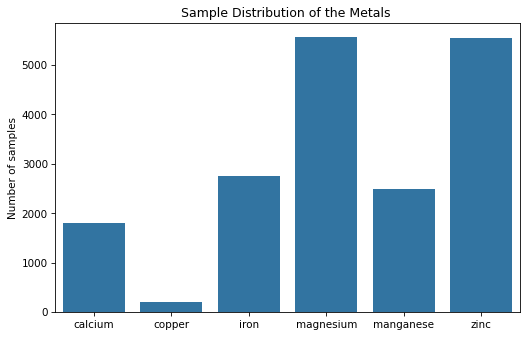

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
ax=sns.barplot(x=metals_list,y=values)
ax.set_title("Sample Distribution of the Metals ")
ax.set_ylabel("Number of samples")
#ax.set_xlabel("Number of samples")
plt.show()

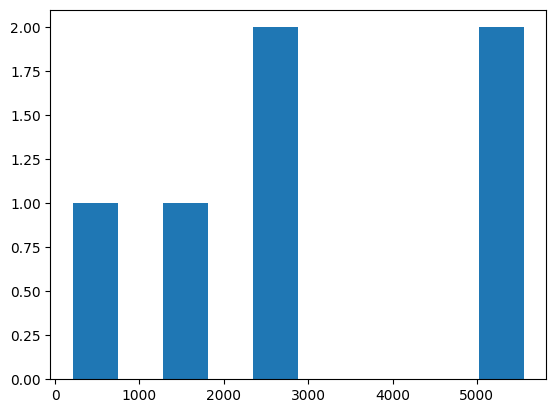

In [12]:
#!conda install -c conda-forge matplotlib
from matplotlib import pyplot as plt
plt.hist(values)
plt.show()

In [13]:
import pickle

file_path = '/home/f087s426/Research/MetaLLM_ACM_Rebuttal/metallm_esmfold_embedding.pkl'

with open(file_path, 'rb') as file:
    embedded_sequence = pickle.load(file)

In [14]:
embedded_sequence=np.array(embedded_sequence)

In [15]:
final_site=df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]['SITES']

In [16]:
final_site

0                                   120,122,124,189,208,250
1         89,91,96,175,229,230,292,299,319,323,542,545,5...
3                                                 95,97,120
11                                  17,18,19,44,45,47,79,80
17                        73,76,78,80,82,94,201,252,255,260
                                ...                        
101350                               92,114,114,116,117,281
101351                               92,114,114,116,117,281
101352                               87,106,106,108,109,280
101353                               90,112,112,114,115,283
101354                               92,115,115,117,118,280
Name: SITES, Length: 18531, dtype: object

In [17]:
final_site.index=np.arange(18531)

In [18]:
final_site.head()

0                              120,122,124,189,208,250
1    89,91,96,175,229,230,292,299,319,323,542,545,5...
2                                            95,97,120
3                              17,18,19,44,45,47,79,80
4                    73,76,78,80,82,94,201,252,255,260
Name: SITES, dtype: object

In [19]:
#type(final_site[0])

In [20]:
li=[]

In [21]:
for i in range(0,18531):
    li.append(np.array(final_site[i].split(','),int))

In [22]:
li=np.array(li)

/tmp/ipykernel_456501/388172736.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  li=np.array(li)


In [23]:
type(li[0][0])

numpy.int64

In [24]:
arr=np.zeros((18521, 1024))

In [25]:
arr.shape

(18521, 1024)

In [26]:
final_site[0]

'120,122,124,189,208,250'

In [27]:
for i in range(0,18521):
    for j in li[i]:
        arr[i][j]=1

In [28]:
arr.shape

(18521, 1024)

In [29]:
arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
concatanate_sequence_final=np.add(embedded_sequence,arr.astype(np.int64),dtype=None)

In [31]:
concatanate_sequence_final.shape

(18521, 1024)

In [32]:
encoded_metal[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

2025-04-04 17:57:31.411802: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2025-04-04 17:57:31.978018: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-04-04 17:57:31.978692: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-04-04 17:57:32.012015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-04 17:57:32.012137: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.71GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2025-04-04 17:57:32.012153: I tensorflow/stream_executor/platform/def

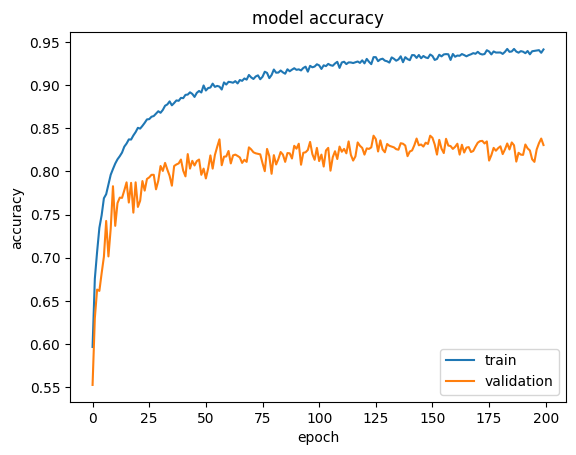

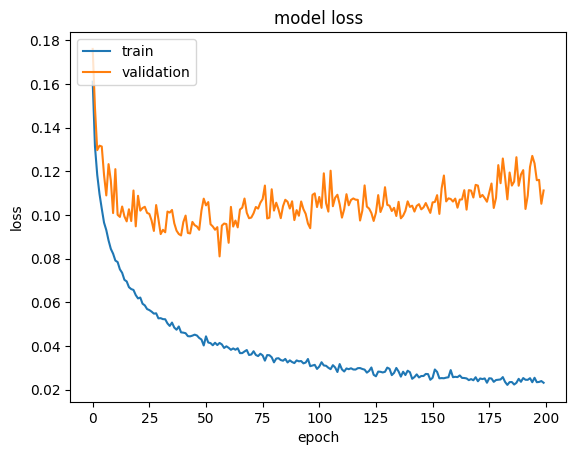

MCC-Score 0.6833324402926386
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.88      0.66      0.76       279
           2       0.00      0.00      0.00         2
           3       0.81      0.87      0.84        15
           4       0.81      0.87      0.84       100
           5       0.72      0.89      0.80       433
           6       0.68      0.42      0.52       326
           7       1.00      0.98      0.99        47
           8       0.00      0.00      0.00         0
           9       0.50      1.00      0.67         5
          10       0.85      0.84      0.85       615

   micro avg       0.80      0.75      0.77      1822
   macro avg       0.57      0.59      0.57      1822
weighted avg       0.80      0.75      0.76      1822
 samples avg       0.73      0.74      0.74      1822



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

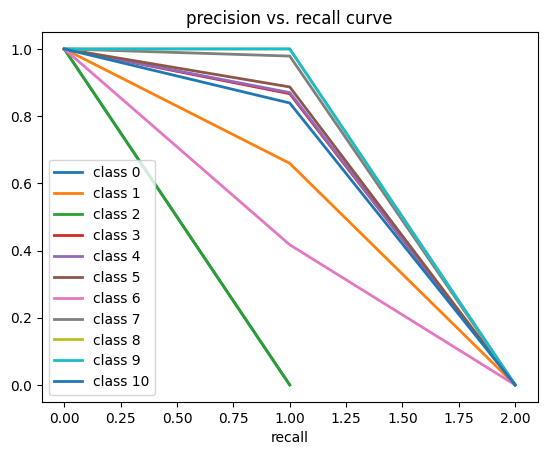

Accuracy is: >0.744


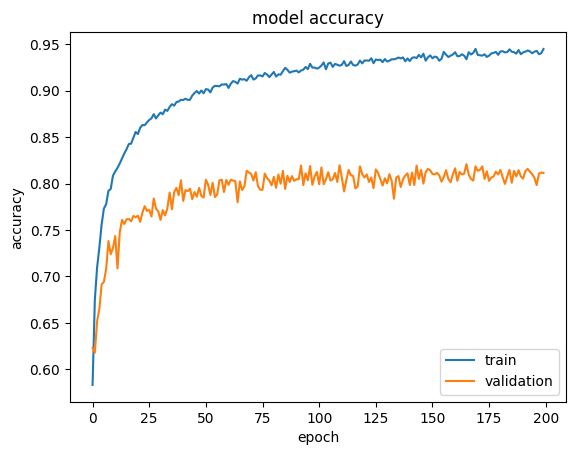

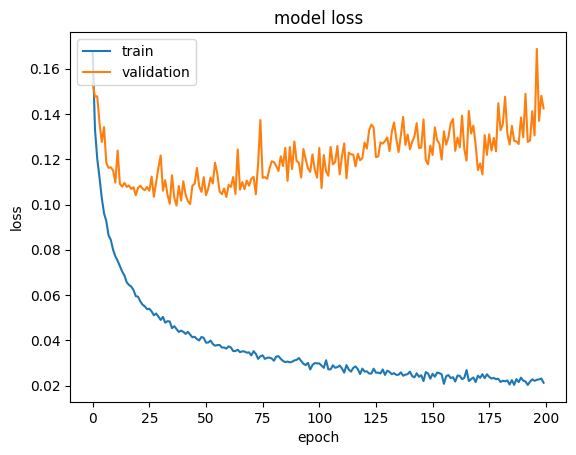

MCC-Score 0.82095818212187
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.85      0.69      0.76       112
           2       0.00      0.00      0.00         2
           3       0.94      0.84      0.89        38
           4       0.99      0.96      0.97       575
           5       0.86      0.87      0.87       463
           6       0.85      0.71      0.78       223
           7       0.50      0.50      0.50         2
           8       1.00      0.60      0.75         5
           9       0.33      1.00      0.50         1
          10       0.85      0.87      0.86       414

   micro avg       0.89      0.87      0.88      1835
   macro avg       0.65      0.64      0.62      1835
weighted avg       0.89      0.87      0.88      1835
 samples avg       0.86      0.86      0.86      1835



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

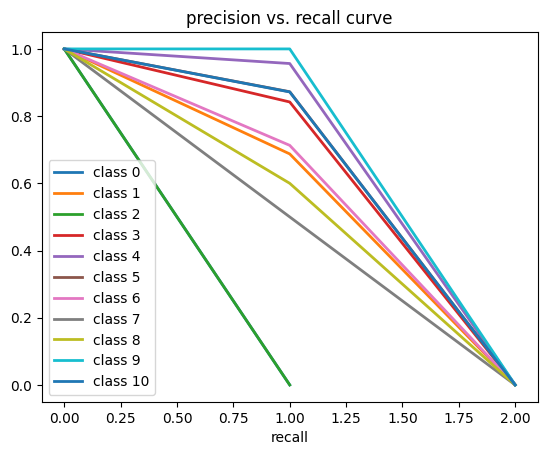

Accuracy is: >0.857


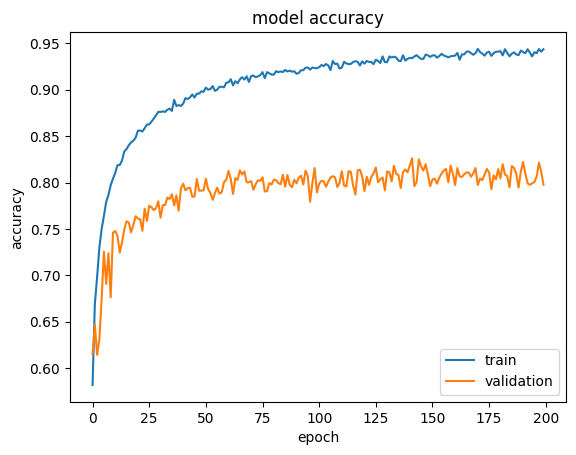

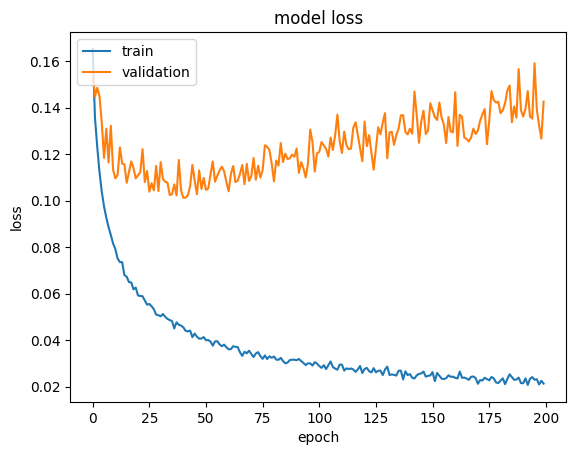

MCC-Score 0.809085047307453
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.87      0.76      0.81       202
           2       0.00      0.00      0.00         0
           3       0.86      0.79      0.83        24
           4       0.98      0.95      0.97       331
           5       0.88      0.86      0.87       475
           6       0.83      0.73      0.78       241
           7       0.07      1.00      0.13         1
           8       0.75      0.60      0.67         5
           9       0.00      0.00      0.00         2
          10       0.90      0.89      0.89       558

   micro avg       0.89      0.85      0.87      1839
   macro avg       0.56      0.60      0.54      1839
weighted avg       0.90      0.85      0.87      1839
 samples avg       0.85      0.85      0.85      1839



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

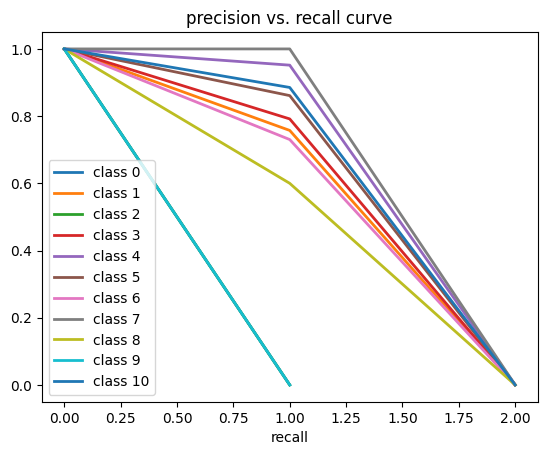

Accuracy is: >0.846


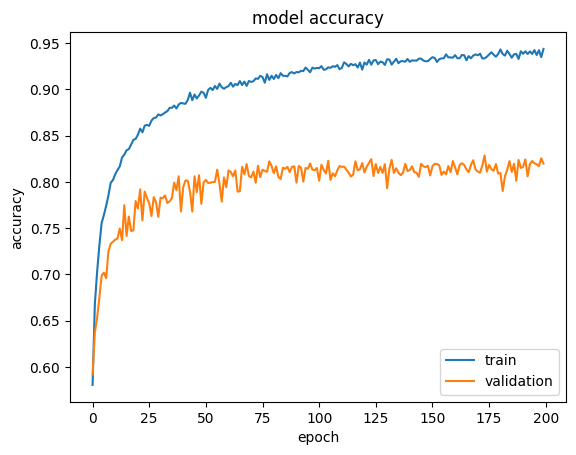

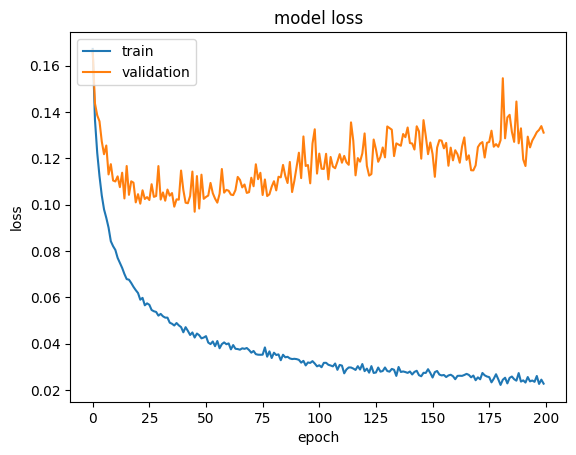

MCC-Score 0.8163448882741019
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.75      0.73      0.74       136
           2       0.00      0.00      0.00         0
           3       0.96      0.73      0.83        33
           4       0.98      0.95      0.96       443
           5       0.90      0.87      0.88       487
           6       0.89      0.70      0.78       222
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         4
           9       0.00      0.00      0.00         0
          10       0.83      0.92      0.87       483

   micro avg       0.88      0.87      0.87      1810
   macro avg       0.62      0.58      0.60      1810
weighted avg       0.89      0.87      0.87      1810
 samples avg       0.84      0.85      0.84      1810



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

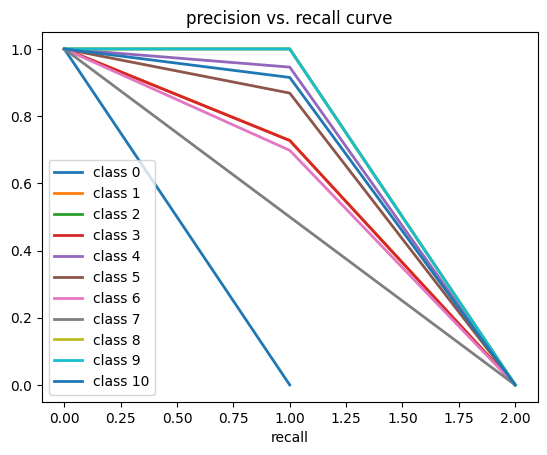

Accuracy is: >0.852


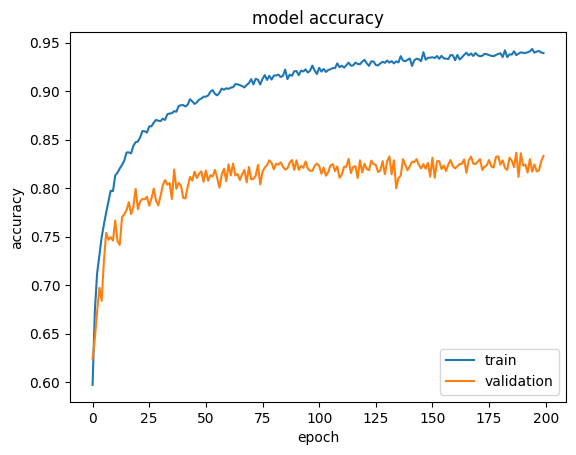

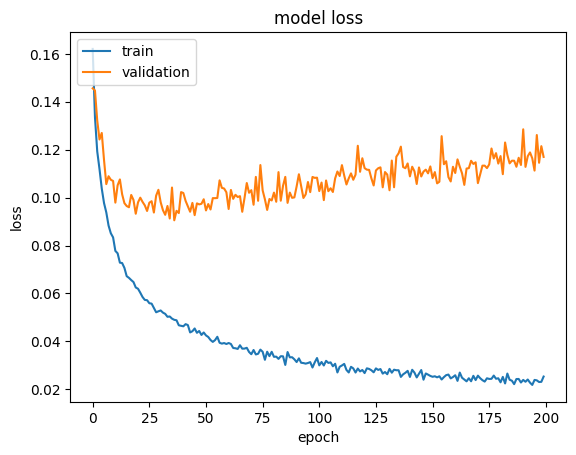

MCC-Score 0.8033045849277595
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.81      0.80      0.80       146
           2       0.00      0.00      0.00         0
           3       1.00      0.82      0.90        28
           4       0.94      0.93      0.94       176
           5       0.87      0.87      0.87       535
           6       0.91      0.79      0.84       327
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.75      0.86         4
          10       0.86      0.87      0.86       610

   micro avg       0.88      0.85      0.86      1826
   macro avg       0.58      0.53      0.55      1826
weighted avg       0.88      0.85      0.86      1826
 samples avg       0.84      0.84      0.84      1826



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

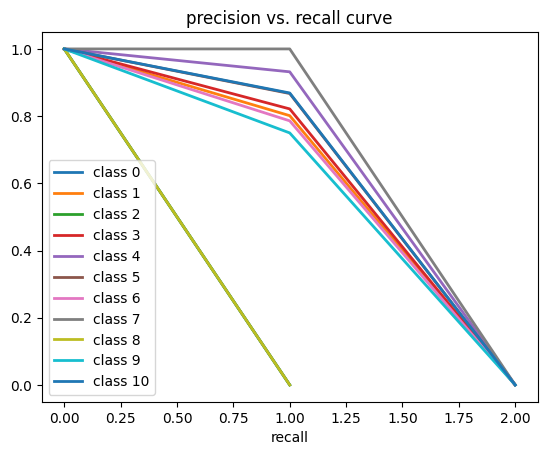

Accuracy is: >0.843


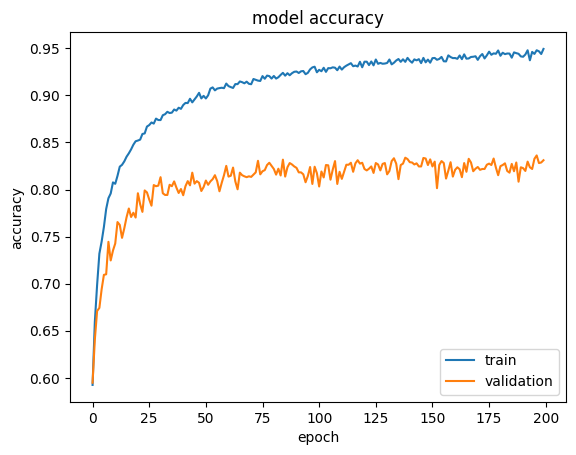

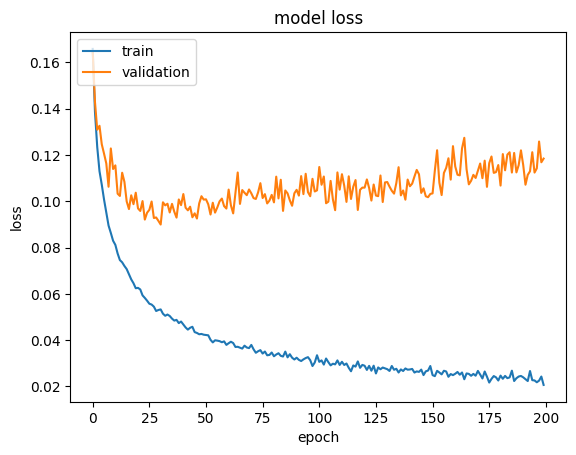

MCC-Score 0.8350468171320187
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.78      0.78      0.78       139
           2       0.00      0.00      0.00         0
           3       0.80      0.89      0.84         9
           4       0.95      0.78      0.86       160
           5       0.90      0.93      0.92       714
           6       0.76      0.76      0.76       120
           7       1.00      0.96      0.98       112
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00        10
          10       0.90      0.87      0.88       497

   micro avg       0.89      0.88      0.88      1761
   macro avg       0.65      0.63      0.64      1761
weighted avg       0.89      0.88      0.88      1761
 samples avg       0.83      0.83      0.83      1761



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

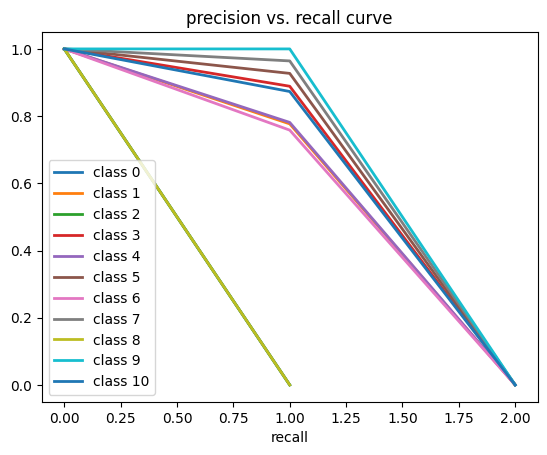

Accuracy is: >0.872


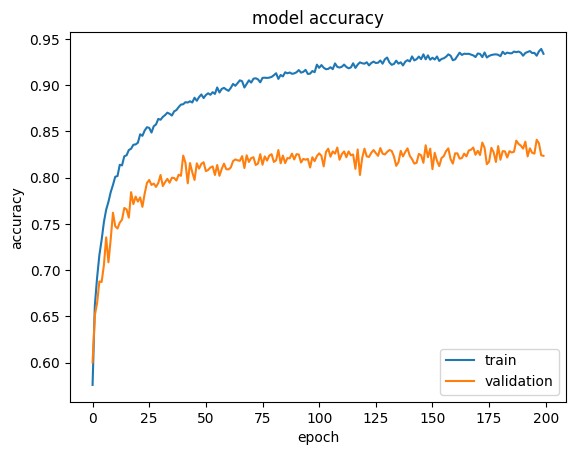

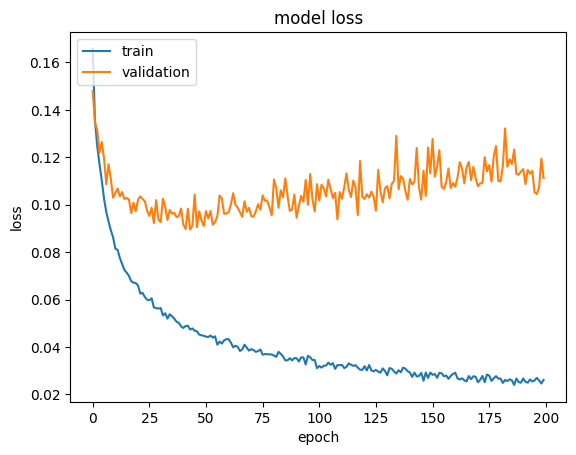

MCC-Score 0.8163149454003764
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.85      0.89      0.87       177
           2       0.00      0.00      0.00         3
           3       0.50      0.80      0.62         5
           4       0.71      0.71      0.71        28
           5       0.92      0.92      0.92       846
           6       0.85      0.56      0.67       124
           7       0.99      0.97      0.98        68
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         4
          10       0.91      0.88      0.89       561

   micro avg       0.90      0.88      0.89      1816
   macro avg       0.61      0.61      0.61      1816
weighted avg       0.90      0.88      0.89      1816
 samples avg       0.86      0.86      0.86      1816



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

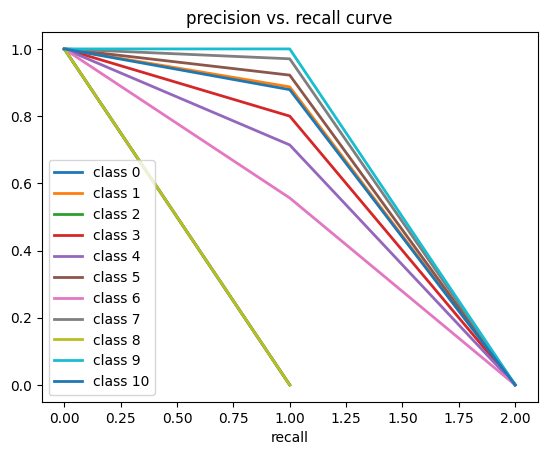

Accuracy is: >0.869


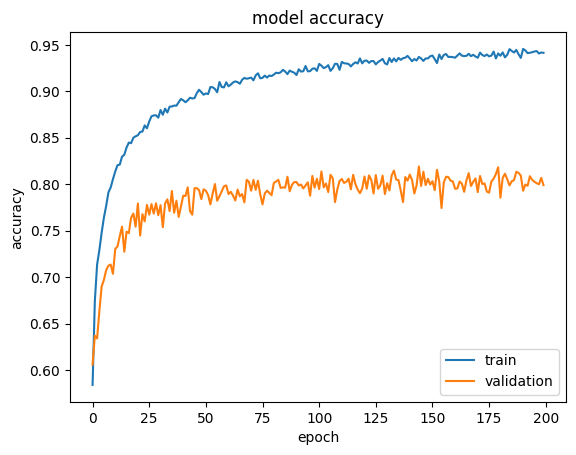

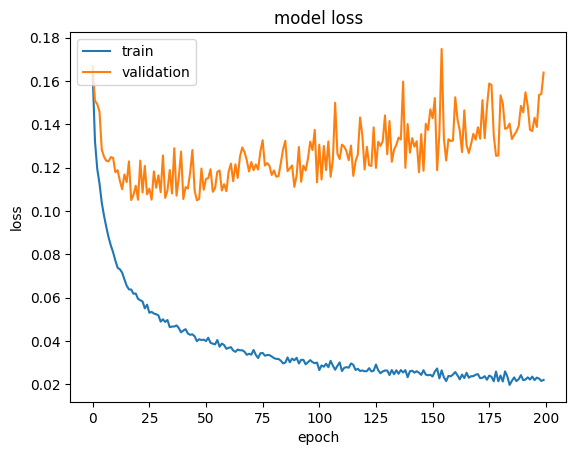

MCC-Score 0.7640077077897699
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.77      0.71      0.74       207
           2       0.00      0.00      0.00         1
           3       0.79      0.58      0.67        19
           4       0.88      0.84      0.86        97
           5       0.80      0.92      0.86       542
           6       0.78      0.65      0.71       220
           7       1.00      0.98      0.99        49
           8       1.00      0.46      0.63        37
           9       1.00      0.50      0.67         2
          10       0.91      0.87      0.89       661

   micro avg       0.85      0.83      0.84      1835
   macro avg       0.72      0.59      0.64      1835
weighted avg       0.85      0.83      0.83      1835
 samples avg       0.81      0.82      0.82      1835



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

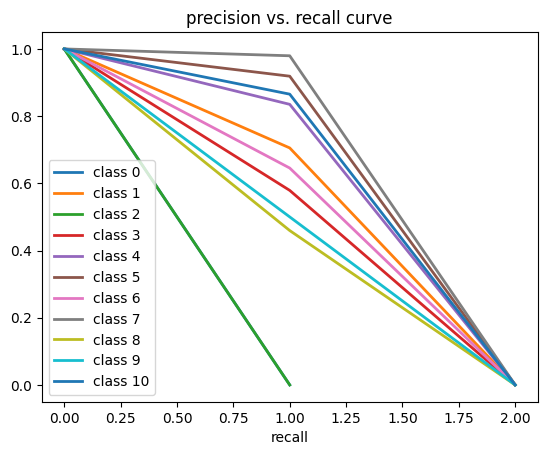

Accuracy is: >0.816


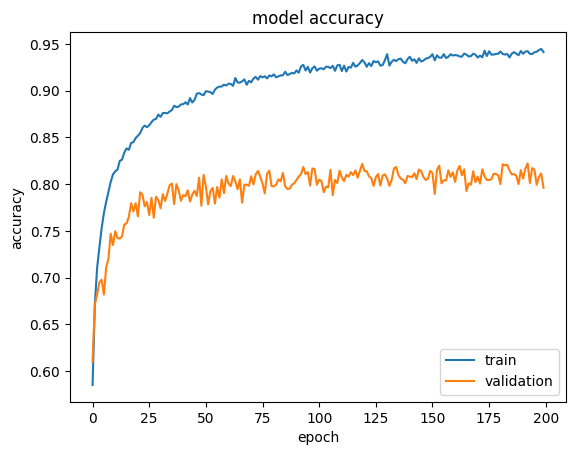

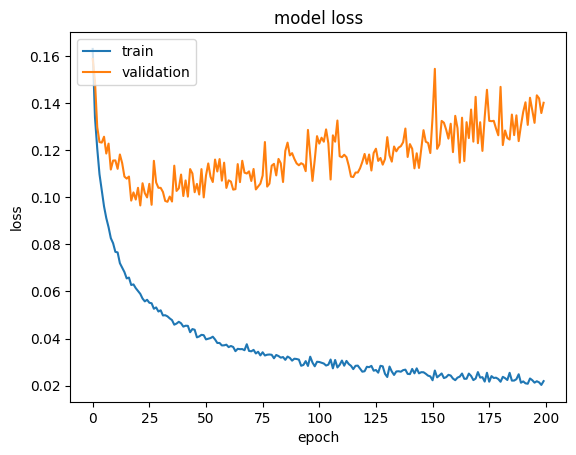

MCC-Score 0.7023042722722619
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.79      0.53      0.63       188
           2       0.00      0.00      0.00         0
           3       0.96      0.79      0.87        29
           4       0.95      0.84      0.89       354
           5       0.78      0.89      0.83       511
           6       0.79      0.54      0.64       242
           7       0.33      0.25      0.29         4
           8       1.00      0.38      0.55        56
           9       1.00      0.14      0.24        22
          10       0.74      0.85      0.79       438

   micro avg       0.80      0.76      0.78      1844
   macro avg       0.67      0.47      0.52      1844
weighted avg       0.81      0.76      0.77      1844
 samples avg       0.76      0.76      0.76      1844



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

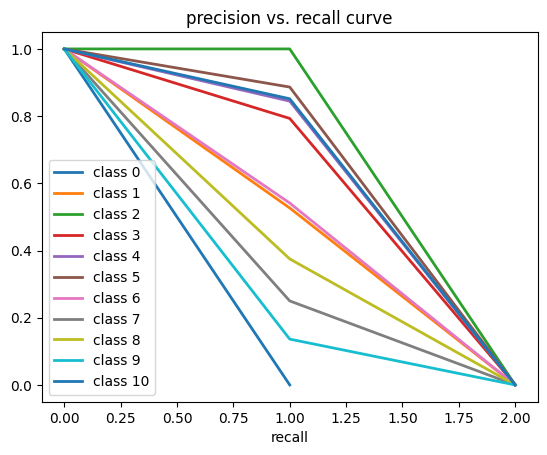

Accuracy is: >0.758


In [ ]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score, matthews_corrcoef
 
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(500, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dropout(0.2)) 
	model.add(Dense(300, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
	return model
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	skf = StratifiedKFold(n_splits=10)
	# enumerate folds
	for train_ix, test_ix in skf.split(X,np.zeros(shape=(X.shape[0], 1))):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		#print(y_test)
		model = get_model(n_inputs, n_outputs)
		# fit model
		history=model.fit(X_train, y_train,validation_split=0.2, verbose=0,batch_size=16, epochs=200,)
		#model.save("protein_model.h5")
		plt.plot(history.history['accuracy'])
		plt.plot(history.history['val_accuracy'])
		plt.title('model accuracy')
		plt.ylabel('accuracy')
		plt.xlabel('epoch')
		plt.legend(['train', 'validation'], loc='lower right')
		plt.show()
		# summarize history for loss
		plt.plot(history.history['loss'])
		plt.plot(history.history['val_loss'])
		plt.title('model loss')
		plt.ylabel('loss')
		plt.xlabel('epoch')
		plt.legend(['train', 'validation'], loc='upper left')
		plt.show()
		yhat = model.predict(X_test)
		#print(yhat)
		yhat = yhat.round()
		#print(y_test)
		mcc = matthews_corrcoef(np.argmax(y_test,axis=1), np.argmax(yhat,axis=1))
		print('MCC-Score',mcc)

		#print(yhat)
		#print(multilabel_confusion_matrix(y_test, yhat))
		acc = accuracy_score(y_test, yhat)
		print(classification_report(y_test, yhat))
		# precision recall curve
		precision = dict()
		recall = dict()
		for i in range(11):
			precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        yhat[:, i])
			plt.plot(recall[i], lw=2, label='class {}'.format(i))    
		plt.xlabel("recall")
		#plt.ylabel("precision")
		plt.legend(loc="best")
		plt.title("precision vs. recall curve")
		plt.show()
		# store result
		print('Accuracy is: >%.3f' % acc)
		results.append(acc)
	return results
 
# load dataset

# evaluate model
results = evaluate_model(concatanate_sequence_final, encoded_metal.astype(np.int64))
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [ ]:
precision_df=pd.read_excel(r'C:\Users\fsshi\OneDrive\Desktop\precision.xlsx')
Recall_df=pd.read_excel(r'C:\Users\fsshi\OneDrive\Desktop\Recall.xlsx')
f1_score_df=pd.read_excel(r'C:\Users\fsshi\OneDrive\Desktop\f1_score.xlsx')

In [ ]:
precision_df

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
#colors_list = ['#6890F0', '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
ax=sns.boxplot(data=precision_df[['calcium','copper','iron','magnesium','manganese','zinc']])
ax.set_title("Precision of 10-fold validations ")
ax.set_ylabel("Precision")
ax.set_xlabel("Name of the Metals")
plt.show()

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
#colors_list = ['#6890F0', '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
ax=sns.boxplot(data=Recall_df[['calcium','copper','iron','magnesium','manganese','zinc']])
ax.set_title("Recall of 10-fold validations ")
ax.set_ylabel("Recall")
ax.set_xlabel("Name of the Metals")
plt.show()


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
#colors_list = ['#6890F0', '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
ax=sns.boxplot(data=f1_score_df[['calcium','copper','iron','magnesium','manganese','zinc']])
ax.set_title("f1-score of 10-fold validations ")
ax.set_ylabel("f1-score")
ax.set_xlabel("Name of the Metals")
plt.show()

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.adapt import MLkNN
from sklearn.metrics import hamming_loss, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(concatanate_sequence_final, encoded_metal.toarray().astype(np.int64), test_size=0.30, random_state=42)

In [55]:
# using Multi-label kNN classifier
mlknn_classifier = MLkNN()
mlknn_classifier.fit(X_train, y_train)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


MLkNN()

In [56]:
predicted = mlknn_classifier.predict(X_test)
  
print(accuracy_score(y_test, predicted))
print(hamming_loss(y_test, predicted))

0.7341726618705036
0.03314257684761282


In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}

clf = GridSearchCV(MLkNN(), parameters, scoring='accuracy')
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{'k': 1, 's': 0.5} 0.8721763726281043


In [99]:
concatanate_sequence_final

array([[ 0.15101209,  1.02546242,  1.09242898, ..., -0.04835367,
        -0.07915092,  0.04481541],
       [ 0.12256728,  0.0555306 ,  0.07029734, ..., -0.11076083,
        -0.02586194, -0.013535  ],
       [-0.00808507,  0.0127356 ,  0.02969295, ..., -0.07468386,
         0.01465157,  0.07405594],
       ...,
       [ 0.08530541,  0.03129741,  0.06689337, ..., -0.03338583,
        -0.06570822,  0.00468705],
       [ 0.07773305,  0.02043255,  0.02849989, ..., -0.0349138 ,
        -0.06302207,  0.07373454],
       [ 0.14269534,  0.01538233,  0.08532126, ..., -0.04965088,
        -0.07019413,  0.06086601]])

In [85]:
encoded_metal.toarray().shape[0]

18531

In [90]:
ll=encoded_metal.toarray().astype(np.int64)

In [113]:
ll[-3]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [138]:
target=np.zeros((18531, 1))
for i in range(ll.shape[0]):
    for j in range(ll.shape[1]):
        if ll[i][j]==1:
            #print(j)
            target[i]=j
            
            

In [140]:
target

array([[10.],
       [ 1.],
       [10.],
       ...,
       [ 5.],
       [ 5.],
       [ 5.]])

In [141]:
X_train, X_test, y_train, y_test = train_test_split(concatanate_sequence_final, target, test_size=0.20, random_state=42)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
predictions = model.predict(X_test)

In [150]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

Accuracy =  0.8454275694631778
              precision    recall  f1-score   support

         0.0       0.98      0.76      0.85        62
         1.0       0.73      0.71      0.72       346
         2.0       0.00      0.00      0.00         1
         3.0       0.84      0.46      0.59        35
         4.0       0.93      0.84      0.88       569
         5.0       0.87      0.92      0.89      1050
         6.0       0.84      0.78      0.81       464
         7.0       1.00      0.94      0.97        63
         8.0       1.00      0.92      0.96        13
         9.0       1.00      0.33      0.50        12
        10.0       0.81      0.87      0.84      1092

    accuracy                           0.85      3707
   macro avg       0.82      0.68      0.73      3707
weighted avg       0.85      0.85      0.84      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
model2 = GaussianNB()

In [158]:
# Model training
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Actual Value: [[ 5.]
 [ 5.]
 [ 5.]
 ...
 [10.]
 [ 5.]
 [ 6.]]
Predicted Value: [10.  5. 10. ... 10.  1.  1.]


In [159]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)

Accuracy =  0.5654167790666307
              precision    recall  f1-score   support

         0.0       0.17      0.79      0.28        62
         1.0       0.32      0.60      0.42       346
         2.0       0.02      1.00      0.04         1
         3.0       0.11      0.60      0.19        35
         4.0       0.78      0.68      0.73       569
         5.0       0.84      0.39      0.53      1050
         6.0       0.58      0.59      0.59       464
         7.0       0.98      0.94      0.96        63
         8.0       1.00      0.69      0.82        13
         9.0       0.56      0.75      0.64        12
        10.0       0.67      0.62      0.65      1092

    accuracy                           0.57      3707
   macro avg       0.55      0.69      0.53      3707
weighted avg       0.68      0.57      0.59      3707



In [160]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8613434043701106


In [162]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy =  0.8613434043701106
              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69        62
         1.0       0.83      0.68      0.75       346
         2.0       0.00      0.00      0.00         1
         3.0       1.00      0.34      0.51        35
         4.0       0.99      0.81      0.89       569
         5.0       0.86      0.95      0.90      1050
         6.0       0.92      0.77      0.84       464
         7.0       1.00      0.94      0.97        63
         8.0       1.00      0.92      0.96        13
         9.0       1.00      0.17      0.29        12
        10.0       0.79      0.93      0.86      1092

    accuracy                           0.86      3707
   macro avg       0.85      0.64      0.70      3707
weighted avg       0.87      0.86      0.86      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)


C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [164]:
yy=neigh.predict(X_test)

In [165]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, yy))
print(classification_report(y_test, yy))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yy)

Accuracy =  0.8478554086862692
              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79        62
         1.0       0.79      0.73      0.76       346
         2.0       0.00      0.00      0.00         1
         3.0       0.35      0.43      0.38        35
         4.0       0.92      0.89      0.90       569
         5.0       0.75      0.96      0.84      1050
         6.0       0.93      0.78      0.85       464
         7.0       0.98      0.97      0.98        63
         8.0       1.00      0.92      0.96        13
         9.0       0.83      0.42      0.56        12
        10.0       0.95      0.79      0.86      1092

    accuracy                           0.85      3707
   macro avg       0.75      0.71      0.72      3707
weighted avg       0.86      0.85      0.85      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=2, max_depth=5, learning_rate=.1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

In [170]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)

Accuracy =  0.7642298354464526
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81        62
         1.0       0.72      0.56      0.63       346
         2.0       0.00      0.00      0.00         1
         3.0       0.94      0.46      0.62        35
         4.0       0.95      0.75      0.84       569
         5.0       0.76      0.86      0.80      1050
         6.0       0.83      0.61      0.70       464
         7.0       0.92      0.97      0.95        63
         8.0       0.92      0.85      0.88        13
         9.0       1.00      0.83      0.91        12
        10.0       0.68      0.81      0.74      1092

    accuracy                           0.76      3707
   macro avg       0.79      0.67      0.72      3707
weighted avg       0.78      0.76      0.76      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

In [185]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(concatanate_sequence_final) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18531 samples in 0.016s...
[t-SNE] Computed neighbors for 18531 samples in 12.879s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18531
[t-SNE] Computed conditional probabilities for sample 2000 / 18531
[t-SNE] Computed conditional probabilities for sample 3000 / 18531
[t-SNE] Computed conditional probabilities for sample 4000 / 18531
[t-SNE] Computed conditional probabilities for sample 5000 / 18531
[t-SNE] Computed conditional probabilities for sample 6000 / 18531
[t-SNE] Computed conditional probabilities for sample 7000 / 18531
[t-SNE] Computed conditional probabilities for sample 8000 / 18531
[t-SNE] Computed conditional probabilities for sample 9000 / 18531
[t-SNE] Computed conditional probabilities for sample 10000 / 18531
[t-SNE] Computed conditional probabilities for sample 11000 / 18531
[t-SNE] Computed conditional probabilities for sample 12000 / 18531
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'Protein sequence in T-SNE projection')]

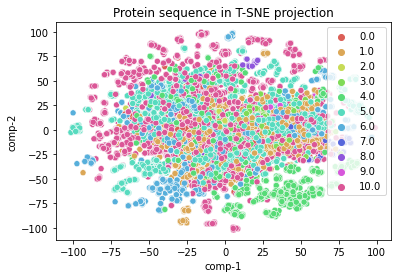

In [186]:
import pandas as pd
df = pd.DataFrame()
#df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=target.flatten(),
                palette=sns.color_palette("hls", 11),
                data=df).set(title="Protein sequence in T-SNE projection")

In [178]:
y_train.shape

(14824, 1)